In [2]:
# Importando as bibliotecas necessárias:
import numpy as np
import matplotlib.pyplot as plt

# Bibliotecas Scikit Learn necessárias:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Utilizando a função mágica para plotagem correta:
%matplotlib inline

#### Trainamento:

In [3]:
# Definindo o número de amostras necessárias:
M = 100

# Definindo a função geradora de FEATURES:
x = (np.random.uniform(-3, 3, M)).reshape(M, 1)

# Definindo a função do RUÍDO:
n = np.random.randn(M, 1)

# Função ORIGINAL SEM RUIDO
y_plot = 2 + x + 0.5 * x**2

# Definindo a função geradora de TARGETS:
y = 2 + x + 0.5 * x**2 + n

#### Teste

In [4]:
# Definindo o número de amostras necessárias
M_teste = 100

# Definindo a função geradora de ENTRADAS (TESTE):
x_ts = (np.linspace(-3, 3, M_teste)).reshape(M_teste, 1)

# Definindo a função geradora de SAÍDAS (TESTE):
y_ts = 2 + x_ts + 0.5 * x_ts ** 2 + n

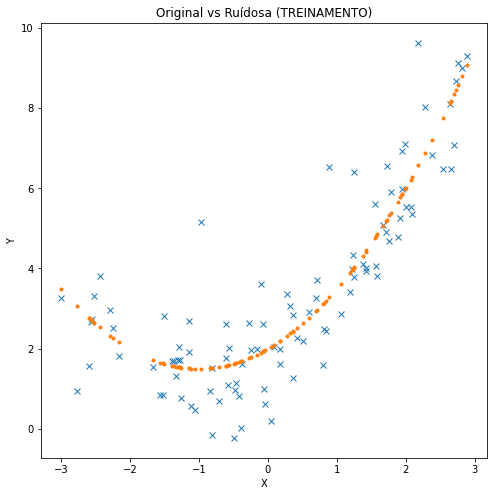

In [5]:
# Plotagem do gráfico:

fig = plt.figure(figsize=(8, 8))
plt.plot(x, y, 'x')
plt.plot(x, y_plot, '.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original vs Ruídosa (TREINAMENTO)')
plt.show()

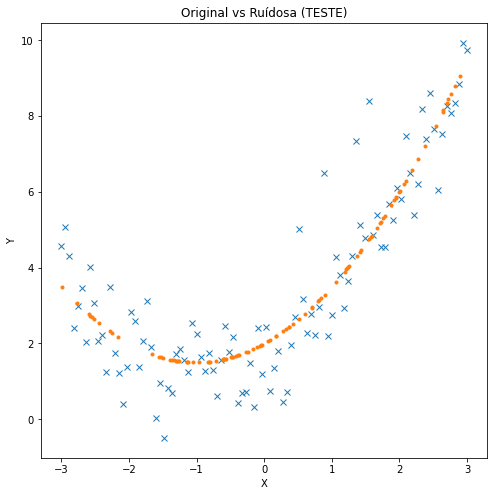

In [6]:
# Plotagem do gráfico:

fig = plt.figure(figsize=(8, 8))
plt.plot(x_ts, y_ts, 'x')
plt.plot(x, y_plot, '.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original vs Ruídosa (TESTE)')
plt.show()

# Lasso

In [7]:
# Definindo aordem polinomial:
model_order = 90

# Definindo o fator de regularização:
lambdas = [10**-10, 1, 1000]

# Define se haverá ou não BIAS (offset):
include_bias = True

# Definição do passo de aprendizagem:
alpha = 0.4

# Definição do número de ITERAÇÕES:
n_epochs = 1000

In [8]:
# Definindo a função responsável por encontrar o erro ótimo:
def mse(X, a, y, M):
    jgd = (1/M)*sum(np.power((y - X.dot(a)), 2))
    return jgd

def bgd(X_train, y_train, X_valid, y_valid, X_test, y_test, model_order, alpha, n_epochs, a_init):
    
    minimum_val_error = float('inf')
    best_epoch = None
    best_model = None
    norm_hist = np.zeros(n_epochs + 1)
    
    # Randomização dos parâmetros de inicialização:
    a = a_init
    
    # Criação das matrizes para armazenas os parâmetros:
    jgd_train = np.zeros(n_epochs + 1)
    jgd_valid = np.zeros(n_epochs + 1)
    jgd_test  = np.zeros(n_epochs + 1)
    
    # Encontrando o valor inicial para cada matriz:
    jgd_train[0] = mse(X_train, a, y_train, len(y_train))
    jgd_valid[0] = mse(X_val, a, y_val, len(y_val))
    jgd_test[0]  = mse(X_test, a, y_test, len(y_test))
    
    norm_hist[0] = np.linalg.norm(a)
    
    # Gradiente descendente batelada LOOP:
    
    # Definindo o valor inicial de ITERAÇÃO:
    iteration = 0
    
    # Definindo o valor inicial do ERRO:
    error = 1
    
    while iteration < n_epochs:
        
        # Aplicação da formula do GRADIENTE:
        gradients = -2/len(y_train)*X_train.T.dot(y_train - X_train.dot(a))
        
        # Atualização dos pesos:
        a = a - alpha * gradients
        
        # Encontrando o valor do erro:
        jgd_train[iteration + 1] = mse(X_train, a, y_train, len(y_train))
        
        # Atualização do ERRO
        error = np.abs(jgd_train[iteration+1] - jgd_train[iteration])
        
        # conjunto de validação 
        jgd_val[iteration+1] = mse(X_valid, a, y_valid, len(y_valid))
        
        # Conjunto de teste
        jgd_test[iteration+1] = mse(X_test, a, y_test, len(y_test))
        
        norm_hist[iteration+1] = np.linalg.norm(a[1:])
        
        # Critério de PARADA
        if Jgd_valid[iteration+1] < minimum_val_error:
            minimum_val_error = jgd_valid[iteration+1]
            best_epoch = iteration
            best_model = a

In [9]:
# Definindo o tamanho do conjunto de treinamento:
v_size = 0.7

# Segregação dos dados para validação e treinamento:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=v_size)

In [10]:
# Imprime como que foi feita a separação:
print('{} do conjunto foi separado para treinamento e {} para validação.'.format(len(y_train), len(y_valid)))

30 do conjunto foi separado para treinamento e 70 para validação.


In [11]:
# Concatenate both column vectors for training set.
X_train = np.ones((len(y_train),1))
for i in range(1, model_order+1):
    X_train = np.c_[X_train, np.power(x_train, i)]

# Run feature-scaling.
scaler = StandardScaler()
X_train = np.c_[np.ones((len(y_train),1)), scaler.fit_transform(X_train[:,1:])]

# Concatenate both column vectors for validation set.
X_valid = np.ones((len(y_valid),1))
for i in range(1, model_order+1):
    X_valid = np.c_[X_valid, np.power(x_valid, i)]

# Run feature-scaling.
X_valid = np.c_[np.ones((len(y_valid),1)), scaler.transform(X_valid[:,1:])]

# Concatenate both column vectors for test set.
X_test = np.ones((len(y_test),1))
for i in range(1, model_order+1):
    X_test = np.c_[X_test, np.power(x_test, i)]

# Run feature-scaling.
X_test = np.c_[np.ones((len(y_test),1)), scaler.transform(X_test[:,1:])]

# Initialize weights.
a_init = np.random.randn(model_order+1, 1)
if(0):
    a_init = np.zeros((model_order+1, 1))
    a_init[0] = 2
    a_init[1] = 1
    a_init[2] = 0.5
    a_init[3] = 1

# Run batch gradient descent.
Jgd_train, Jgd_val, Jgd_test, minimum_val_error, best_epoch, best_model, norm_hist, a = bgd(X_train, y_train, X_val, y_val, X_test, y_test, model_order, alpha, n_epochs, a_init)

a_opt = [1, 0.5, 1]
print('best_epoch:',best_epoch)
print('minimum_val_error:',minimum_val_error)
print('norma:', np.linalg.norm(best_model[1:])/30)
print('norma:', np.linalg.norm(a_opt)/3)

NameError: name 'y_test' is not defined